In [1]:
import pandas as pd

In [2]:
file_path = "Dataset.csv"
df = pd.read_csv(file_path)

In [3]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        2009 non-null   object 
 1   Date        2009 non-null   object 
 2   PM2.5       1863 non-null   float64
 3   PM10        1649 non-null   float64
 4   NO          2003 non-null   float64
 5   NO2         2003 non-null   float64
 6   NOx         2005 non-null   float64
 7   NH3         1806 non-null   float64
 8   CO          1998 non-null   float64
 9   SO2         2003 non-null   float64
 10  O3          1865 non-null   float64
 11  Benzene     1743 non-null   float64
 12  Toluene     1916 non-null   float64
 13  Xylene      0 non-null      float64
 14  AQI         1910 non-null   float64
 15  AQI_Bucket  1910 non-null   object 
dtypes: float64(13), object(3)
memory usage: 251.3+ KB


(None,
         City      Date  PM2.5  PM10     NO    NO2    NOx    NH3     CO    SO2  \
 0  Bengaluru  1/1/2015    NaN   NaN   3.26  17.33  10.88  20.36   0.33   3.54   
 1  Bengaluru  1/2/2015    NaN   NaN   6.05  19.73  14.14  23.74   1.35   3.97   
 2  Bengaluru  1/3/2015    NaN   NaN  11.91  19.88  20.72   4.32  17.40  13.61   
 3  Bengaluru  1/4/2015    NaN   NaN   7.45  21.61  16.88   0.87   5.05   6.52   
 4  Bengaluru  1/5/2015    NaN   NaN   9.52  22.17  21.76  31.38   1.83   4.71   
 
       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
 0  10.73     0.56     4.64     NaN  NaN        NaN  
 1  22.77     0.65     5.31     NaN  NaN        NaN  
 2  12.03     0.53    19.25     NaN  NaN        NaN  
 3  17.70     0.55     7.47     NaN  NaN        NaN  
 4  12.72     0.40     4.36     NaN  NaN        NaN  )

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.drop(columns=['Xylene'], inplace=True)

In [6]:
num_cols = df.select_dtypes(include=['float64']).columns
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.mean()))

In [7]:
df.loc[:, 'AQI_Bucket'] = df['AQI_Bucket'].fillna(df['AQI_Bucket'].mode()[0])

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        2009 non-null   object        
 1   Date        2009 non-null   datetime64[ns]
 2   PM2.5       2009 non-null   float64       
 3   PM10        2009 non-null   float64       
 4   NO          2009 non-null   float64       
 5   NO2         2009 non-null   float64       
 6   NOx         2009 non-null   float64       
 7   NH3         2009 non-null   float64       
 8   CO          2009 non-null   float64       
 9   SO2         2009 non-null   float64       
 10  O3          2009 non-null   float64       
 11  Benzene     2009 non-null   float64       
 12  Toluene     2009 non-null   float64       
 13  AQI         2009 non-null   float64       
 14  AQI_Bucket  2009 non-null   object        
dtypes: datetime64[ns](1), float64(12), object(2)
memory usage: 235.6+ KB


(None,
         City       Date      PM2.5       PM10     NO    NO2    NOx    NH3  \
 0  Bengaluru 2015-01-01  35.819828  83.243287   3.26  17.33  10.88  20.36   
 1  Bengaluru 2015-01-02  35.819828  83.243287   6.05  19.73  14.14  23.74   
 2  Bengaluru 2015-01-03  35.819828  83.243287  11.91  19.88  20.72   4.32   
 3  Bengaluru 2015-01-04  35.819828  83.243287   7.45  21.61  16.88   0.87   
 4  Bengaluru 2015-01-05  35.819828  83.243287   9.52  22.17  21.76  31.38   
 
       CO    SO2     O3  Benzene  Toluene        AQI    AQI_Bucket  
 0   0.33   3.54  10.73     0.56     4.64  94.318325  Satisfactory  
 1   1.35   3.97  22.77     0.65     5.31  94.318325  Satisfactory  
 2  17.40  13.61  12.03     0.53    19.25  94.318325  Satisfactory  
 3   5.05   6.52  17.70     0.55     7.47  94.318325  Satisfactory  
 4   1.83   4.71  12.72     0.40     4.36  94.318325  Satisfactory  )

In [10]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
AQI           0
AQI_Bucket    0
dtype: int64

In [ ]:
# Verify no missing values remain
print("Missing values after preprocessing:")
print(df.isnull().sum())

# Select features and target
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']
target = 'AQI'

# Filter data for Bangalore only
bangalore_df = df[df['City'] == 'Bengaluru'].copy()  # Changed to 'Bengaluru'

# Extract date components as features
bangalore_df['Year'] = bangalore_df['Date'].dt.year
bangalore_df['Month'] = bangalore_df['Date'].dt.month
bangalore_df['Day'] = bangalore_df['Date'].dt.day

# Final feature list including date components
features.extend(['Year', 'Month', 'Day'])

# Make variables global
global df, bangalore_df, features, target, X_train_scaled, X_test_scaled, y_train, y_test, final_model

Missing values after preprocessing:
City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
AQI           0
AQI_Bucket    0
dtype: int64


In [12]:
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler

print("Cities available:", df['City'].unique())
bangalore_df = df[df['City'] == 'Bengaluru'].copy()

if len(bangalore_df) == 0:
    raise ValueError("No data found for 'Bengaluru'. Check your dataset.")
print(f"\nFound {len(bangalore_df)} samples for Bengaluru")

features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']
target = 'AQI'

bangalore_df['Year'] = bangalore_df['Date'].dt.year
bangalore_df['Month'] = bangalore_df['Date'].dt.month
bangalore_df['Day'] = bangalore_df['Date'].dt.day
features.extend(['Year', 'Month', 'Day'])

X = bangalore_df[features]
y = bangalore_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nData ready for modeling!")
print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")

Cities available: ['Bengaluru']

Found 2009 samples for Bengaluru

Data ready for modeling!
Training samples: 1607, Test samples: 402


In [13]:
import numpy as np

class GreyWolfOptimizer:
    def __init__(self, n_wolves=10, max_iter=100, dim=None, lb=None, ub=None):
        self.n_wolves = n_wolves
        self.max_iter = max_iter
        self.dim = dim
        self.lb = lb
        self.ub = ub
        self.alpha_pos = None
        self.alpha_score = float('inf')
        self.beta_pos = None
        self.beta_score = float('inf')
        self.delta_pos = None
        self.delta_score = float('inf')
        self.positions = None
        
    def initialize(self):
        self.positions = np.random.uniform(self.lb, self.ub, (self.n_wolves, self.dim))
        
    def update_position(self, a):
        for i in range(self.n_wolves):
            for j in range(self.dim):
                # Update A, C, D for alpha, beta, delta
                r1, r2 = np.random.random(2)
                A1 = 2 * a * r1 - a
                C1 = 2 * r2
                D_alpha = abs(C1 * self.alpha_pos[j] - self.positions[i,j])
                X1 = self.alpha_pos[j] - A1 * D_alpha
                
                r1, r2 = np.random.random(2)
                A2 = 2 * a * r1 - a
                C2 = 2 * r2
                D_beta = abs(C2 * self.beta_pos[j] - self.positions[i,j])
                X2 = self.beta_pos[j] - A2 * D_beta
                
                r1, r2 = np.random.random(2)
                A3 = 2 * a * r1 - a
                C3 = 2 * r2
                D_delta = abs(C3 * self.delta_pos[j] - self.positions[i,j])
                X3 = self.delta_pos[j] - A3 * D_delta
                
                # Update position
                self.positions[i,j] = (X1 + X2 + X3) / 3
                
                # Boundary check
                self.positions[i,j] = np.clip(self.positions[i,j], self.lb, self.ub)
    
    def optimize(self, objective_func):
        self.initialize()
        
        for iter in range(self.max_iter):
            a = 2 - iter * (2 / self.max_iter)  # a decreases linearly from 2 to 0
            
            # Evaluate all wolves
            scores = np.array([objective_func(pos) for pos in self.positions])
            
            # Update alpha, beta, delta
            for i in range(scores.shape[0]):
                if scores[i] < self.alpha_score:
                    self.alpha_score = scores[i]
                    self.alpha_pos = self.positions[i].copy()
                elif scores[i] < self.beta_score:
                    self.beta_score = scores[i]
                    self.beta_pos = self.positions[i].copy()
                elif scores[i] < self.delta_score:
                    self.delta_score = scores[i]
                    self.delta_pos = self.positions[i].copy()
            
            # Update positions
            self.update_position(a)
            
            if iter % 10 == 0:
                print(f'Iteration {iter}: Best Score = {self.alpha_score}')
        
        return self.alpha_pos, self.alpha_score

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Define objective function for GWO
def objective_function(position):
    # Position represents feature weights
    weighted_X_train = X_train_scaled * position
    weighted_X_test = X_test_scaled * position
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(weighted_X_train, y_train)
    
    y_pred = model.predict(weighted_X_test)
    return mean_squared_error(y_test, y_pred)

# Initialize and run GWO
dim = X_train_scaled.shape[1]
lb = 0.1  # Lower bound for feature weights
ub = 2.0  # Upper bound for feature weights

gwo = GreyWolfOptimizer(n_wolves=15, max_iter=50, dim=dim, lb=lb, ub=ub)
best_weights, best_score = gwo.optimize(objective_function)

print(f"Best weights: {best_weights}")
print(f"Best MSE: {best_score}")

Iteration 0: Best Score = 564.3193440777749
Iteration 10: Best Score = 564.2365030220259
Iteration 20: Best Score = 564.1311641840073
Iteration 30: Best Score = 564.1311641840073
Iteration 40: Best Score = 564.0342459377646
Best weights: [1.69877682 1.79297241 0.33341665 0.76173449 0.66044856 0.30770399
 1.6853118  1.29604716 0.78141297 0.8368973  2.         1.73553914
 1.81743473 1.27849602]
Best MSE: 564.0342459377646


In [15]:
# Apply best weights to features
X_train_weighted = X_train_scaled * best_weights
X_test_weighted = X_test_scaled * best_weights

# Train final model
final_model = RandomForestRegressor(n_estimators=200, random_state=42)
final_model.fit(X_train_weighted, y_train)

# Evaluate
y_pred = final_model.predict(X_test_weighted)
mse = mean_squared_error(y_test, y_pred)
print(f"Final Model MSE: {mse}")

# Feature importance
importances = final_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# Make final_model global (ADD THIS LINE AT THE END)
global final_model

Final Model MSE: 556.2699502375515

Feature Importance:
    Feature  Importance
6        CO    0.240157
1      PM10    0.228565
0     PM2.5    0.210557
8        O3    0.060101
2        NO    0.043860
7       SO2    0.043231
4       NOx    0.038394
3       NO2    0.029197
5       NH3    0.023557
10  Toluene    0.023354
9   Benzene    0.022127
13      Day    0.016563
12    Month    0.014702
11     Year    0.005633


In [16]:
def predict_aqi(future_date):
    # Create feature vector for the future date
    future_date = pd.to_datetime(future_date)
    future_features = {
        'Year': future_date.year,
        'Month': future_date.month,
        'Day': future_date.day,
    }
    
    # For pollutants, use the median values from historical data
    for feature in features:
        if feature not in future_features:
            future_features[feature] = bangalore_df[feature].median()
    
    # Create DataFrame and scale
    future_df = pd.DataFrame([future_features])[features]
    future_scaled = scaler.transform(future_df)
    future_weighted = future_scaled * best_weights
    
    # Predict
    aqi_pred = final_model.predict(future_weighted)[0]
    
    # Predict AQI Bucket (simplified version)
    if aqi_pred <= 50:
        bucket = "Good"
    elif aqi_pred <= 100:
        bucket = "Satisfactory"
    elif aqi_pred <= 200:
        bucket = "Moderate"
    elif aqi_pred <= 300:
        bucket = "Poor"
    elif aqi_pred <= 400:
        bucket = "Very Poor"
    else:
        bucket = "Severe"
    
    return aqi_pred, bucket

# Example prediction
future_date = "2025-05-15"
aqi, bucket = predict_aqi(future_date)
print(f"Predicted AQI for {future_date}: {aqi:.2f} ({bucket})")

Predicted AQI for 2025-05-15: 84.15 (Satisfactory)


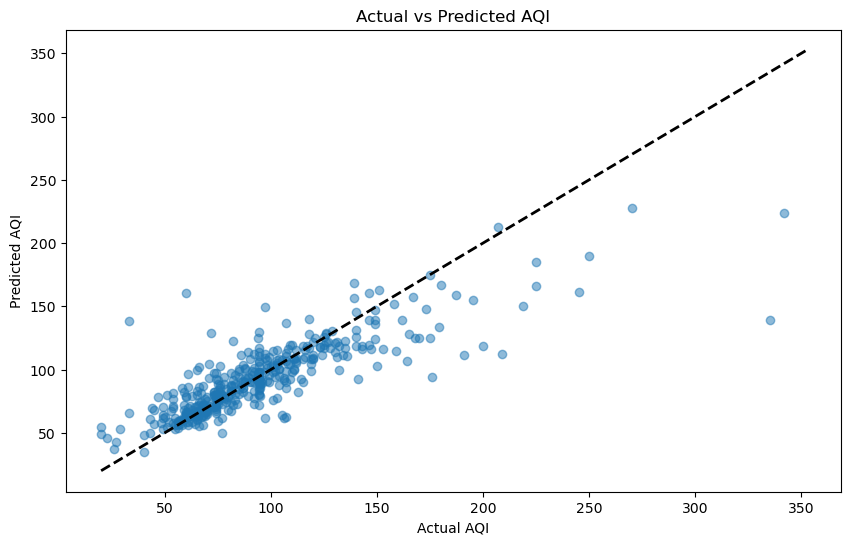

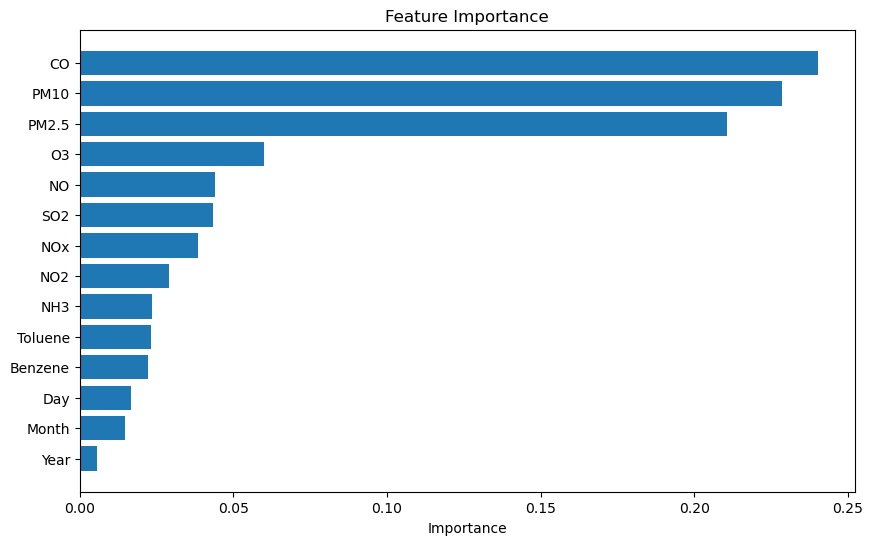

In [17]:
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI')
plt.show()

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [18]:
# Quick Model Evaluation (Run after your original cells)
from sklearn.metrics import mean_absolute_error, r2_score

# Get predictions
y_pred = final_model.predict(X_test_weighted)

# Calculate key metrics
print("Model Accuracy:")
print(f"- MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"- R²: {r2_score(y_test, y_pred):.2f} (1.0 is perfect)")

# Sample comparison
print("\nSample Predictions vs Actual:")
for true, pred in zip(y_test[:5], y_pred[:5]):
    print(f"Actual: {true:.1f} | Predicted: {pred:.1f}")

Model Accuracy:
- MAE: 13.91
- R²: 0.67 (1.0 is perfect)

Sample Predictions vs Actual:
Actual: 106.0 | Predicted: 91.7
Actual: 20.0 | Predicted: 54.3
Actual: 175.0 | Predicted: 125.1
Actual: 74.0 | Predicted: 76.4
Actual: 123.0 | Predicted: 117.6


In [19]:
# Predict AQI for May 15, 2025
future_date = "2026-07-25"
aqi, bucket = predict_aqi(future_date)
print(f"Predicted AQI for {future_date}: {aqi:.2f} ({bucket})")

Predicted AQI for 2026-07-25: 81.30 (Satisfactory)


In [20]:
test_dates = ["2026-01-25", "2029-06-15", "2030-10-15"]
for date in test_dates:
    aqi, bucket = predict_aqi(date)
    print(f"{date}: {aqi:.2f} ({bucket})")

2026-01-25: 91.43 (Satisfactory)
2029-06-15: 83.68 (Satisfactory)
2030-10-15: 84.43 (Satisfactory)


In [21]:
# Predict AQI for May 15, 2025
future_date = "2015-05-02"
aqi, bucket = predict_aqi(future_date)
print(f"Predicted AQI for {future_date}: {aqi:.2f} ({bucket})")

Predicted AQI for 2015-05-02: 87.54 (Satisfactory)
